<a href="https://colab.research.google.com/github/Stelvlen/MATH-509/blob/main/STAT_509_Final_Project_edition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import os

## Data cleaning process

In [ ]:
## Import csv data from github repo
data1 = pd.read_csv('https://raw.githubusercontent.com/Stelvlen/MATH-509/main/application_record.csv?token=GHSAT0AAAAAAB3NB2K7J2XQ77HIYTGHWFPKY3ZOQ6A')
data1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
data2 = pd.read_csv("https://github.com/Stelvlen/MATH-509/raw/5d518153798b041d3def159959a7f6cf372430e4/credit_record(2).csv")
data2

,ID,STATUS
0,5001711,X
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,C
...,...,...
1048570,5150487,C
1048571,5150487,C
1048572,5150487,C
1048573,5150487,C


In [ ]:
data3 = pd.read_csv("https://raw.githubusercontent.com/Stelvlen/MATH-509/main/credit_record.csv?token=GHSAT0AAAAAAB3NB2K6K7PX23XTAYJ2G4LSY3ZOTPQ")
data3

,ID,STATUS
0,5001711.0,X
1,5001712.0,0
2,5001713.0,0
3,5001714.0,0
4,5001715.0,C
...,...,...
1048570,NaN,C
1048571,NaN,C
1048572,NaN,C
1048573,NaN,C


In [ ]:
data_weight = data2.groupby("ID")["STATUS"].value_counts(normalize=True).to_frame("PROP").reset_index().pivot("ID", "STATUS", "PROP").sort_index()
data_weight

STATUS,0,1,2,3,4,5,C,X
ID,,,,,,,,
5001711,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.25
5001712,0.526316,NaN,NaN,NaN,NaN,NaN,0.473684,NaN
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
...,...,...,...,...,...,...,...,...
5150482,0.666667,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
5150484,0.923077,NaN,NaN,NaN,NaN,NaN,0.076923,NaN


In [ ]:
data3 = data_weight.idxmax(axis=1)
index = data3.isin(["X", "C"])
data3[index] = "good"
data3[~index] = "bad"

ID
5001711     bad
5001712     bad
5001713    good
5001714    good
5001715    good
           ... 
5150482     bad
5150483    good
5150484     bad
5150485     bad
5150487    good
Length: 45985, dtype: object

In [ ]:
data3.name = "STATUS"
data_clean = data1.merge(data3, on='ID', how="inner").dropna()
data_clean

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,good
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,good
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,bad


In [ ]:
data_clean['STATUS'].value_counts(normalize=True)
data_clean.reset_index(drop=True, inplace=True)
# Mojority class baseline 

In [ ]:
## Convert negative employed days to positive. As an result, un
for i in range(len(data_clean['DAYS_EMPLOYED'])):
  if data_clean['DAYS_EMPLOYED'][i]>=0:
    data_clean['DAYS_EMPLOYED'][i]=0
  else:
    data_clean['DAYS_EMPLOYED'][i]=data_clean['DAYS_EMPLOYED'][i]*-1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


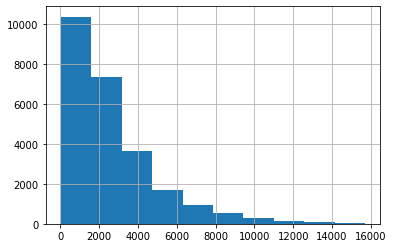

In [ ]:
data_clean['DAYS_EMPLOYED'].hist()

In [ ]:
for i in range (len(data_clean['DAYS_BIRTH'])):
  data_clean['DAYS_BIRTH'][i]=data_clean['DAYS_BIRTH'][i]*-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


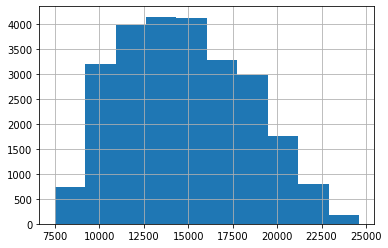

In [ ]:
data_clean['DAYS_BIRTH'].hist()

In [ ]:
data_clean['NAME_INCOME_TYPE'] = data_clean['NAME_INCOME_TYPE'].astype('category')
data_clean['NAME_EDUCATION_TYPE'] = data_clean['NAME_EDUCATION_TYPE'].astype('category')
data_clean['NAME_FAMILY_STATUS'] = data_clean['NAME_FAMILY_STATUS'].astype('category')
data_clean['NAME_HOUSING_TYPE'] = data_clean['NAME_HOUSING_TYPE'].astype('category')
data_clean['OCCUPATION_TYPE'] = data_clean['OCCUPATION_TYPE'].astype('category')

In [ ]:
data_clean.dtypes

ID                        int64
CODE_GENDER               int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
STATUS                    int64
dtype: object

In [ ]:
data_clean['CODE_GENDER'].replace('M', 0, inplace=True)
data_clean['CODE_GENDER'].replace('F', 1, inplace=True)
data_clean['FLAG_OWN_CAR'].replace('Y', 0, inplace=True)
data_clean['FLAG_OWN_CAR'].replace('N', 1, inplace=True)
data_clean['FLAG_OWN_REALTY'].replace('Y', 0, inplace=True)
data_clean['FLAG_OWN_REALTY'].replace('N', 1, inplace=True)
data_clean['STATUS'].replace('bad', 0, inplace=True)
data_clean['STATUS'].replace('good', 1, inplace=True)
data_clean.dtypes

ID                        int64
CODE_GENDER               int64
FLAG_OWN_CAR              int64
FLAG_OWN_REALTY           int64
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
OCCUPATION_TYPE        category
CNT_FAM_MEMBERS         float64
STATUS                    int64
dtype: object

In [30]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [31]:
data_clean2=copy.deepcopy(data_clean)

data_clean2=convert_dummy(data_clean,'NAME_INCOME_TYPE')
data_clean2=convert_dummy(data_clean,'NAME_EDUCATION_TYPE')
data_clean2=convert_dummy(data_clean,'NAME_FAMILY_STATUS')
data_clean2=convert_dummy(data_clean,'NAME_HOUSING_TYPE')
data_clean2=convert_dummy(data_clean,'OCCUPATION_TYPE')

In [32]:
data_clean2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008806,0,0,0,0,112500.0,21474,1134,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5008808,1,1,0,0,270000.0,19110,3051,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5008809,1,1,0,0,270000.0,19110,3051,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5008810,1,1,0,0,270000.0,19110,3051,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008811,1,1,0,0,270000.0,19110,3051,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,0,0,0,0,315000.0,17348,2420,1,0,...,0,0,1,0,0,0,0,0,0,0
25130,5149834,1,1,0,0,157500.0,12387,1325,1,0,...,0,0,0,1,0,0,0,0,0,0
25131,5149838,1,1,0,0,157500.0,12387,1325,1,0,...,0,0,0,1,0,0,0,0,0,0
25132,5150049,1,1,0,0,283500.0,17958,655,1,0,...,0,0,0,0,0,0,1,0,0,0


## Spliting training and testing cases in our analysis

In [34]:
x = data_clean2.copy().drop(columns=['ID', 'STATUS'])
y = data_clean2[['STATUS']]
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=100)

## Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=300,max_depth=50,min_samples_leaf=2)
clf.fit(x_training,y_training)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=300)

In [44]:
#clf.score(x_testing, y_testing)
y_predict = clf.predict(x_testing)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict)))

Accuracy Score is 0.66561
      0     1
0  1496   922
1   759  1850


## Neural network


In [49]:
from sklearn.neural_network import MLPClassifier

model_nw = MLPClassifier((50, 50, 50, 50))
model_nw.fit(x_training, y_training)

y_predict_nw = model_nw.predict(x_testing)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_nw)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_nw)))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.5178
    0     1
0  20  2398
1  26  2583


## Logistic regression classification

In [42]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(C=1,
                           random_state=0,
                           solver='lbfgs')
model_lg.fit(x_training, y_training)

y_predict_lg = model_lg.predict(x_testing)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_lg)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_lg)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.519
   0     1
0  0  2418
1  0  2609


## Decision Tree

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_training, y_training)

y_predict_dt = model_dt.predict(x_testing)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_testing, y_predict_dt)))
print(pd.DataFrame(confusion_matrix(y_testing,y_predict_dt)))

Accuracy Score is 0.65864
      0     1
0  1646   772
1   944  1665
